In [1]:
!pip install ultralytics roboflow 


  Using cached ultralytics-8.3.168-py3-none-any.whl.metadata (37 kB)
  Using cached roboflow-1.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached torch-2.7.1-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.22.1-cp310-cp310-win_amd64.whl.metadata (6.1 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pillow_heif-1.0.0-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Using cached pillow_avif_plugin-1.5.2-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached numpy-2.2.6-cp

In [30]:
pip install matplotlib pillow scipy numpy


Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib
import PIL
import scipy

print("Matplotlib:", matplotlib.__version__)
print("Pillow:", PIL.__version__)
print("Scipy:", scipy.__version__)


Matplotlib: 3.10.0
Pillow: 11.1.0
Scipy: 1.15.3


In [3]:
import zipfile
import os

# Unzip uploaded dataset
zip_path = "FlowerStemDetection.v2i.yolov8.zip"
extract_path = "flower_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done.")


Extraction done.


In [4]:
from ultralytics import YOLO

# Load a pretrained model
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt or yolov8m.pt for better accuracy

# Train the model
results = model.train(
    data=f'{extract_path}/data.yaml',
    epochs=30,
    imgsz=640,
    batch=8,
    patience=10
)


Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i5-13450HX)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=flower_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning C:\Users\praga\flowerYOLOv8\flower_dataset\train\labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 0.80.1 MB/s, size: 10.2 KB)



C:\Users\praga\.conda\envs\tensorflow31018\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\praga\flowerYOLOv8\flower_dataset\valid\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
C:\Users\praga\.conda\envs\tensorflow31018\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      2.317      4.351      1.986          3        640: 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all          4          4    0.00333          1    0.00512    0.00326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.804       3.56      1.575          3        640: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          4          4    0.00333          1      0.497      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G       1.74      2.784      1.518          5        640: 100%|██████████| 6/6 [00:06<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          4          4    0.00333          1       0.52       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.657      2.648      1.431          2        640: 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          4          4    0.00333          1      0.461      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/30         0G      1.544      2.642      1.453          2        640: 100%|██████████| 6/6 [00:07<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all          4          4    0.00333          1      0.563      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.737      2.625      1.537          5        640: 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all          4          4    0.00333          1      0.995      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.645      2.352      1.454          4        640: 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all          4          4    0.00333          1      0.995      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.729      2.665      1.589          4        640: 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all          4          4      0.808          1      0.995      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/30         0G      1.482      2.226      1.354          3        640: 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          4          4      0.903          1      0.995      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.753      2.442       1.54          4        640: 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          4          4          1       0.66      0.995      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.437      2.312      1.326          2        640: 100%|██████████| 6/6 [00:06<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          4          4          1      0.472      0.646      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/30         0G      1.448      2.349      1.353          2        640: 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          4          4      0.584       0.75      0.631      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/30         0G      1.471      2.314       1.45          2        640: 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all          4          4          1       0.44      0.738      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/30         0G      1.694      2.383      1.512          1        640: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          4          4       0.51       0.25      0.496       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/30         0G      1.342      2.105       1.33          5        640: 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          4          4       0.51       0.25      0.496       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.626      2.077      1.461          4        640: 100%|██████████| 6/6 [00:07<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all          4          4          1      0.711      0.822      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.369      1.879      1.313          4        640: 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all          4          4          1      0.748      0.945      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/30         0G      1.307      1.803      1.264          2        640: 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all          4          4      0.964       0.75      0.912      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.668      2.141       1.57          2        640: 100%|██████████| 6/6 [00:06<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          4          4      0.964       0.75      0.912      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/30         0G      1.469      1.778      1.341          2        640: 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          4          4      0.969       0.75      0.828       0.42
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 10, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

20 epochs completed in 0.044 hours.


Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i5-13450HX)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]


                   all          4          4          1      0.661      0.995      0.609
Speed: 0.7ms preprocess, 50.8ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs\detect\train4


In [5]:
metrics = model.val()
print("Metrics:", metrics)
 

Ultralytics 8.3.168  Python-3.10.18 torch-2.7.1+cpu CPU (13th Gen Intel Core(TM) i5-13450HX)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 64.016.5 MB/s, size: 10.2 KB)


val: Scanning C:\Users\praga\flowerYOLOv8\flower_dataset\valid\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
C:\Users\praga\.conda\envs\tensorflow31018\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


                   all          4          4          1      0.661      0.995      0.609
Speed: 0.9ms preprocess, 79.7ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs\detect\train42
Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CF7CCD5690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.0

In [6]:
results = model.predict(source=f'{extract_path}/valid/images', save=True, conf=0.25)



image 1/4 C:\Users\praga\flowerYOLOv8\flower_dataset\valid\images\IMG20250708162527-removebg-preview_png.rf.088155f8da52937a47dccc5947c3fecb.jpg: 640x640 (no detections), 77.6ms
image 2/4 C:\Users\praga\flowerYOLOv8\flower_dataset\valid\images\IMG20250708162540-removebg-preview_png.rf.72ce6cd834fd352bff3df9335a85d355.jpg: 640x640 (no detections), 60.5ms
image 3/4 C:\Users\praga\flowerYOLOv8\flower_dataset\valid\images\IMG20250708162615-removebg-preview_png.rf.e5210f6b4093ec22142e190a0c027a18.jpg: 640x640 (no detections), 70.4ms
image 4/4 C:\Users\praga\flowerYOLOv8\flower_dataset\valid\images\IMG20250708162642-removebg-preview_png.rf.0898b99c1b64d27b177a9fe522ba9c34.jpg: 640x640 (no detections), 80.9ms
Speed: 2.1ms preprocess, 72.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\train43


In [7]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')  # Path to your best model
results = model.predict(source='flower_dataset/test/images', save=True,conf=0.25)



image 1/2 C:\Users\praga\flowerYOLOv8\flower_dataset\test\images\IMG20250708162358-removebg-preview_png.rf.cbf0a966d7893878959c6821433392f2.jpg: 640x640 (no detections), 96.3ms
image 2/2 C:\Users\praga\flowerYOLOv8\flower_dataset\test\images\IMG20250708162412-removebg-preview_png.rf.b8cac6e2fd14cc6d2ffb2243facf8ab1.jpg: 640x640 (no detections), 148.4ms
Speed: 4.5ms preprocess, 122.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6


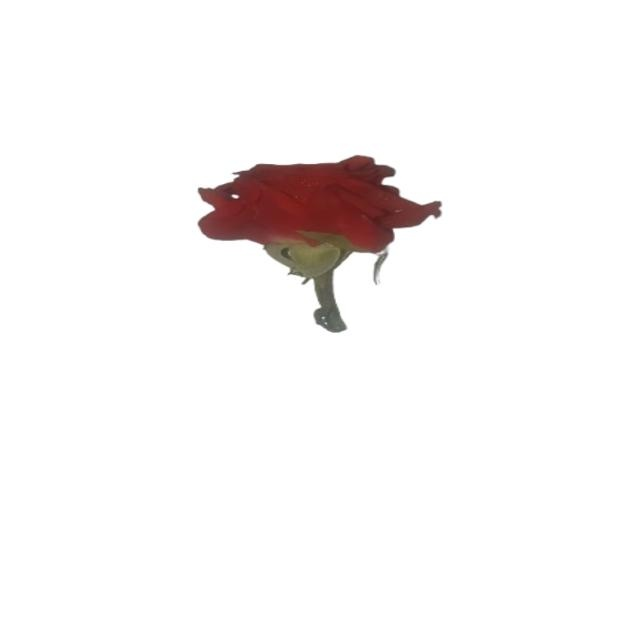

In [1]:
import glob
from IPython.display import Image, display

# Find all predicted images
predicted_images = glob.glob('runs/detect/predict/*.jpg')

# Display the first one (if available)
if predicted_images:
    display(Image(filename=predicted_images[0]))
else:
    print("No predicted images found in 'runs/detect/predict/'. Run prediction first.")


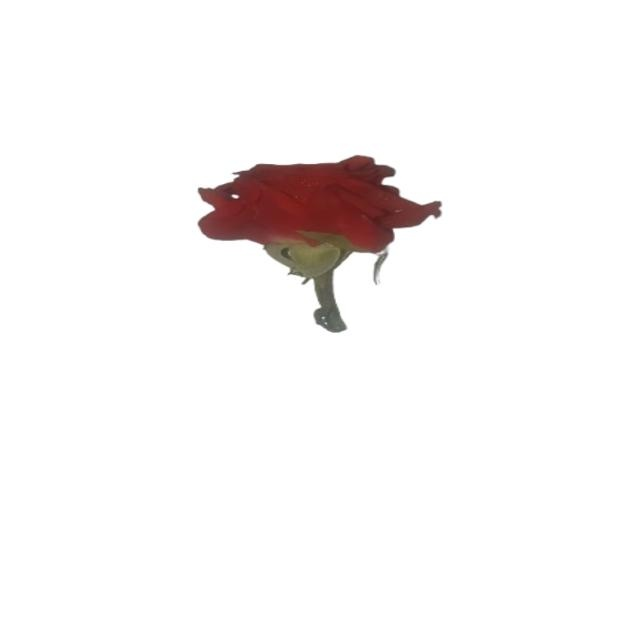

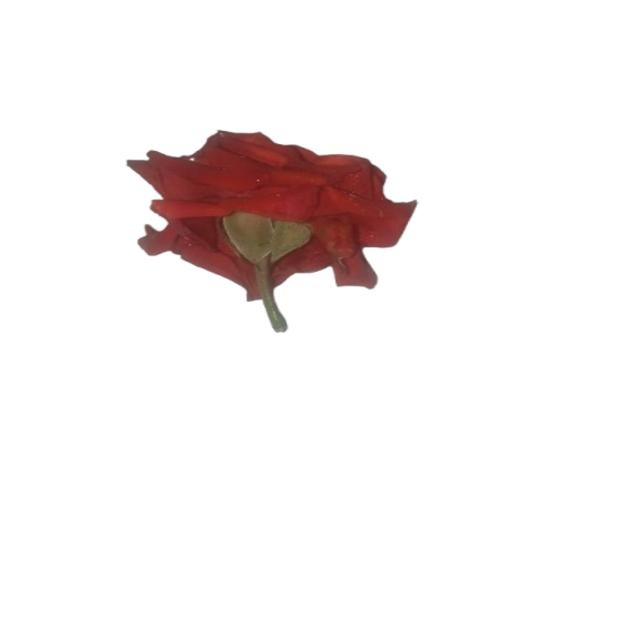

In [2]:
for img_path in predicted_images:
    display(Image(filename=img_path))


In [4]:
from ipywidgets import FileUpload, Output, VBox, Button, HTML
from IPython.display import display, clear_output
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO('runs/detect/train/weights/best.pt')  # Update path if needed

# Create widgets
upload = FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Image'
)

process_button = Button(
    description='Process Image',
    button_style='success',
    disabled=True
)

output = Output()
status_html = HTML(value="<p>Please upload an image file to begin.</p>")

# Enable Process button after upload
def on_upload_change(change):
    if upload.value:
        process_button.disabled = False
        status_html.value = "<p style='color: green;'>Image uploaded successfully! Click 'Process Image' to run detection.</p>"
    else:
        process_button.disabled = True
        status_html.value = "<p>Please upload an image file to begin.</p>"

# Process image
def process_image(button):
    with output:
        clear_output()
        if not upload.value:
            print("No image uploaded!")
            return

        try:
            uploaded_file = upload.value[0]
            image_bytes = uploaded_file['content']

            # ✅ Convert image to RGB to avoid 4-channel error
            image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
            img_array = np.array(image)

            print("Running YOLO inference...")
            results = model(img_array)

            # Plotting
            plt.figure(figsize=(15, 10))

            # Original Image
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title('Original Image')
            plt.axis('off')

            # YOLO Detections
            plt.subplot(1, 2, 2)
            annotated_image = results[0].plot()
            annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
            plt.imshow(annotated_image_rgb)
            plt.title('YOLO Detections')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            # Detection Results
            print("\n" + "="*50)
            print("DETECTION RESULTS")
            print("="*50)

            if len(results[0].boxes) > 0:
                for i, box in enumerate(results[0].boxes):
                    class_id = int(box.cls[0])
                    class_name = model.names[class_id]
                    confidence = float(box.conf[0])
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

                    print(f"Detection {i+1}:")
                    print(f"  Class: {class_name}")
                    print(f"  Confidence: {confidence:.2f}")
                    print(f"  Bounding Box: ({x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f})")
                    print("-" * 30)
                print(f"\nTotal detections: {len(results[0].boxes)}")
            else:
                print("No objects detected in the image.")

        except Exception as e:
            print(f"Error processing image: {str(e)}")

# Bind events
upload.observe(on_upload_change, names='value')
process_button.on_click(process_image)

# Display interface
interface = VBox([
    HTML(value="<h2>YOLO Object Detection</h2>"),
    status_html,
    upload,
    process_button,
    output
])

display(interface)


In [5]:
from ipywidgets import FileUpload, Output, VBox, Button, HTML
from IPython.display import display, clear_output, Image as IPImage
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load YOLO model (change path if needed)
model = YOLO('runs/detect/train/weights/best.pt')

# Create interface widgets
upload = FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Image'
)

process_button = Button(
    description='Process Image',
    button_style='success',
    disabled=True
)

output = Output()
status_html = HTML(value="<p>Please upload an image file to begin.</p>")

# Enable process button once image is uploaded
def on_upload_change(change):
    if upload.value:
        process_button.disabled = False
        status_html.value = "<p style='color: green;'>Image uploaded successfully! Click 'Process Image' to run detection.</p>"
    else:
        process_button.disabled = True
        status_html.value = "<p>Please upload an image file to begin.</p>"

# Process image with YOLO
def process_image(button):
    with output:
        clear_output()
        if not upload.value:
            print("No image uploaded!")
            return

        try:
            uploaded_file = upload.value[0]
            image_bytes = uploaded_file['content']

            # Convert to RGB (removes alpha channel)
            image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
            img_array = np.array(image)

            # YOLO inference
            print("Running YOLO inference...")
            results = model(img_array)

            # Plot original and detection
            plt.figure(figsize=(15, 10))

            # Original Image
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title('Original Image')
            plt.axis('off')

            # YOLO Detections
            plt.subplot(1, 2, 2)
            annotated_image = results[0].plot()
            annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
            plt.imshow(annotated_image_rgb)
            plt.title('YOLO Detections')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            # Save the detection image
            cv2.imwrite("detected_output.jpg", annotated_image)

            # Show saved image in notebook
            display(HTML("<h4>Detected Image (Saved)</h4>"))
            display(IPImage(filename="detected_output.jpg"))

            # Detection box info
            print("\n" + "="*50)
            print("DETECTION RESULTS")
            print("="*50)

            if len(results[0].boxes) > 0:
                for i, box in enumerate(results[0].boxes):
                    class_id = int(box.cls[0])
                    class_name = model.names[class_id]
                    confidence = float(box.conf[0])
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

                    print(f"Detection {i+1}:")
                    print(f"  Class: {class_name}")
                    print(f"  Confidence: {confidence:.2f}")
                    print(f"  Bounding Box: ({x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f})")
                    print("-" * 30)
                print(f"\nTotal detections: {len(results[0].boxes)}")
            else:
                print("No objects detected in the image.")

        except Exception as e:
            print(f"Error processing image: {str(e)}")

# Link events
upload.observe(on_upload_change, names='value')
process_button.on_click(process_image)

# Display UI
interface = VBox([
    HTML(value="<h2>YOLOv8 Object Detection</h2>"),
    status_html,
    upload,
    process_button,
    output
])

display(interface)


In [6]:
from ipywidgets import FileUpload, Output, VBox, Button, HTML
from IPython.display import display, clear_output, Image as IPImage
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load your trained YOLO model
model = YOLO('runs/detect/train/weights/best.pt')  # Update path if needed

# Create widgets
upload = FileUpload(
    accept='image/*',
    multiple=False,
    description='Upload Image'
)

process_button = Button(
    description='Process Image',
    button_style='success',
    disabled=True
)

output = Output()
status_html = HTML(value="<p>Please upload an image file to begin.</p>")

# Handle upload change
def on_upload_change(change):
    if upload.value:
        process_button.disabled = False
        status_html.value = "<p style='color: green;'>Image uploaded successfully! Click 'Process Image' to run detection.</p>"
    else:
        process_button.disabled = True
        status_html.value = "<p>Please upload an image file to begin.</p>"

# Process uploaded image
def process_image(button):
    with output:
        clear_output()
        if not upload.value:
            print("No image uploaded!")
            return

        try:
            uploaded_file = upload.value[0]
            image_bytes = uploaded_file['content']

            # Convert RGBA/PNG to RGB
            image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
            img_array = np.array(image)

            # Run YOLOv8 with high confidence threshold
            print("Running YOLO inference with conf=0.9...")
            results = model(img_array, conf=0.9)

            # Plot original and detected image
            plt.figure(figsize=(15, 10))

            # Original Image
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title('Original Image')
            plt.axis('off')

            # Detections
            plt.subplot(1, 2, 2)
            annotated_image = results[0].plot()
            annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
            plt.imshow(annotated_image_rgb)
            plt.title('YOLO Detections (≥90% confidence)')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            # Save and display detection image
            save_path = "detected_output.jpg"
            cv2.imwrite(save_path, annotated_image)
            display(HTML("<h4>Detected Image (Saved)</h4>"))
            display(IPImage(filename=save_path))

            # Print detection details (only if confidence ≥ 0.9)
            print("\n" + "="*50)
            print("DETECTION RESULTS (≥90% Confidence)")
            print("="*50)

            count = 0
            for i, box in enumerate(results[0].boxes):
                confidence = float(box.conf[0])
                if confidence >= 0.9:
                    class_id = int(box.cls[0])
                    class_name = model.names[class_id]
                    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

                    count += 1
                    print(f"Detection {count}:")
                    print(f"  Class: {class_name}")
                    print(f"  Confidence: {confidence:.2f}")
                    print(f"  Bounding Box: ({x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f})")
                    print("-" * 30)

            if count == 0:
                print("❌ No detections with ≥90% confidence found.")

        except Exception as e:
            print(f"❌ Error processing image: {str(e)}")

# Connect event handlers
upload.observe(on_upload_change, names='value')
process_button.on_click(process_image)

# Display interface
interface = VBox([
    HTML(value="<h2>YOLOv8 Object Detection (≥90% Confidence)</h2>"),
    status_html,
    upload,
    process_button,
    output
])

display(interface)
